# Solar Study Toulouse

## 1 - Preliminary work

### 1.1 - Import packages and load data

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [2]:
#Choix des options

#Lien pour les données
#data_path=""
#data_path="Données/"
data_path="../Données/"

In [3]:
from utility_tools import regroupement_data

data_hToulouse_solar,data_dToulouse_solar=regroupement_data(data_path+'Data_Toulouse/Solar/',1980,2022,data_type="solar")
data_hToulouse_weather,data_dToulouse_weather=regroupement_data(data_path+'Data_Toulouse/Weather/',2000,2022,data_type="weather")

Toutes les données sont différentes
Toutes les données sont différentes


### 1.2 - Tendency and Seasonnality study

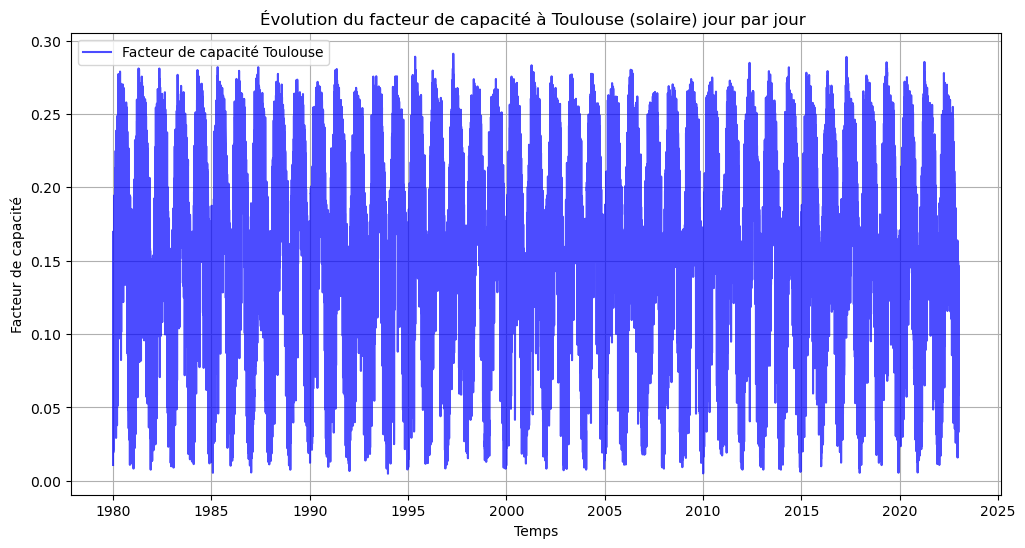

In [4]:
# Création du graphique de série temporelle pour la capacité
plt.figure(figsize=(12, 6))
plt.plot(data_dToulouse_solar.index, data_dToulouse_solar['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (solaire) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Calcul de la tendance et de la saisonnalité

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

#Ajouter étude plus approfondie tendance

tendency_Toulouse_solar,seasonnality_Toulouse_solar1=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mobile1_d')
tendency_Toulouse_solar,seasonnality_Toulouse_solar7=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mobile7_d')
tendency_Toulouse_solar,seasonnality_Toulouse_solar14=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mobile14_d')
tendency_Toulouse_solar,seasonnality_Toulouse_solar28=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mobile28_d')


Tendance à Toulouse :  0.16630004987478247


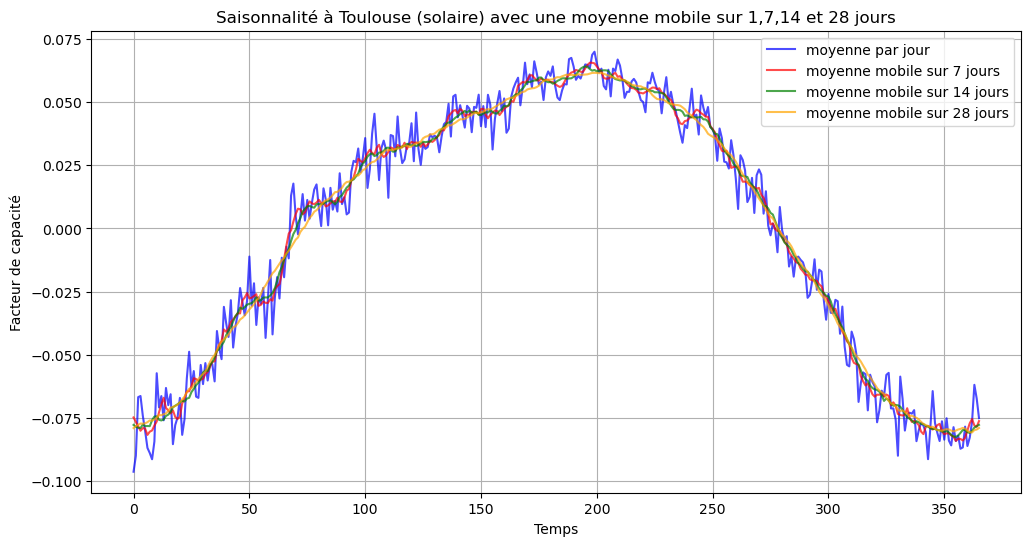

In [9]:
# Affichage de la tendance et de la saisonnalité

print("Tendance à Toulouse : ",tendency_Toulouse_solar)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),seasonnality_Toulouse_solar1, label='moyenne par jour', color='blue', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar7, label='moyenne mobile sur 7 jours', color='red', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar14, label='moyenne mobile sur 14 jours', color='green', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar28, label='moyenne mobile sur 28 jours', color='orange', alpha=0.7)
plt.legend()
plt.title('Saisonnalité à Toulouse (solaire) avec une moyenne mobile sur 1,7,14 et 28 jours')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

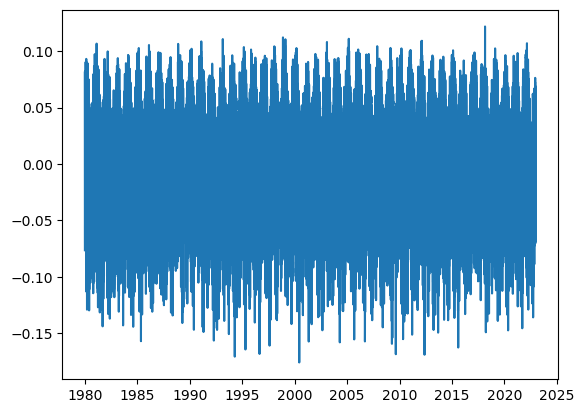

In [8]:
# Affichage des résidus

from methodes_etude_serie import Retrait_Tendance_Saisonnalite

data_stationnary = Retrait_Tendance_Saisonnalite(data_dToulouse_solar, tendency_Toulouse_solar, seasonnality_Toulouse_solar28)

plt.plot(data_stationnary['electricity'])

### 1-3 Seasonnality sinus approximation

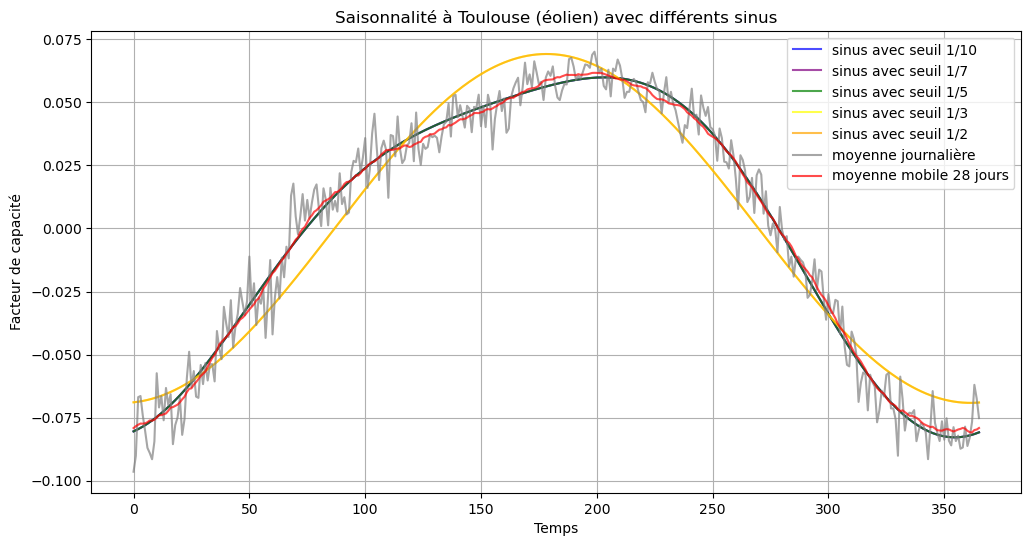

In [14]:
# Calcul de la tendance et de la saisonnalité estimé à l'aide du sinus interpolé sans moyenne mobile avec différents seuils

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_solar,sinus1_t10_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t10')
tendency_Toulouse_solar,sinus1_t7_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t7')
tendency_Toulouse_solar,sinus1_t5_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t5')
tendency_Toulouse_solar,sinus1_t3_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t3')
tendency_Toulouse_solar,sinus1_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t2')
tendency_Toulouse_solar,mean_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mean')

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),sinus1_t10_Toulouse_solar, label='sinus avec seuil 1/10', color='blue', alpha=0.7)
plt.plot(np.arange(366),sinus1_t7_Toulouse_solar, label='sinus avec seuil 1/7', color='purple', alpha=0.7)
plt.plot(np.arange(366),sinus1_t5_Toulouse_solar, label='sinus avec seuil 1/5', color='green', alpha=0.7)
plt.plot(np.arange(366),sinus1_t3_Toulouse_solar, label='sinus avec seuil 1/3', color='yellow', alpha=0.7)
plt.plot(np.arange(366),sinus1_t2_Toulouse_solar, label='sinus avec seuil 1/2', color='orange', alpha=0.7)
plt.plot(np.arange(366),mean_Toulouse_solar, label='moyenne journalière', color='grey', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar28['electricity'], label='moyenne mobile 28 jours', color='red', alpha=0.7)
plt.legend()
plt.title('Saisonnalité à Toulouse (éolien) avec différents sinus')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

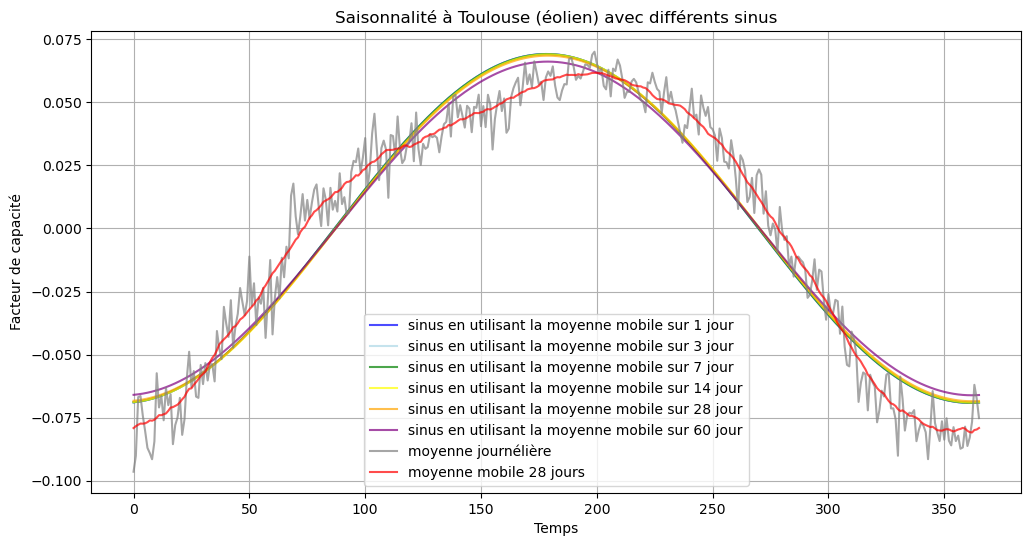

In [15]:
# Calcul de la tendance et de la saisonnalité estimé à l'aide du sinus interpolé avec différentes moyennes mobiles avec un seuil de 0.5

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_solar,sinus1_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus1_t2')
tendency_Toulouse_solar,sinus3_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus3_t2')
tendency_Toulouse_solar,sinus7_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus7_t2')
tendency_Toulouse_solar,sinus14_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus14_t2')
tendency_Toulouse_solar,sinus28_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus28_t2')
tendency_Toulouse_solar,sinus60_t2_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='sinus60_t2')
tendency_Toulouse_solar,mean_Toulouse_solar=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_solar, methode_tend='mean',methode_saison='mean')

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),sinus1_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 1 jour', color='blue', alpha=0.7)
plt.plot(np.arange(366),sinus3_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 3 jour', color='lightblue', alpha=0.7)
plt.plot(np.arange(366),sinus7_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 7 jour', color='green', alpha=0.7)
plt.plot(np.arange(366),sinus14_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 14 jour', color='yellow', alpha=0.7)
plt.plot(np.arange(366),sinus28_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 28 jour', color='orange', alpha=0.7)
plt.plot(np.arange(366),sinus60_t2_Toulouse_solar, label='sinus en utilisant la moyenne mobile sur 60 jour', color='purple', alpha=0.7)
plt.plot(np.arange(366),mean_Toulouse_solar, label='moyenne journélière', color='grey', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_solar28['electricity'], label='moyenne mobile 28 jours', color='red', alpha=0.7)
plt.title('Saisonnalité à Toulouse (éolien) avec différents sinus')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

## 2- Arma and Arimax modelisation

### 2-1 Arma modelisation

C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

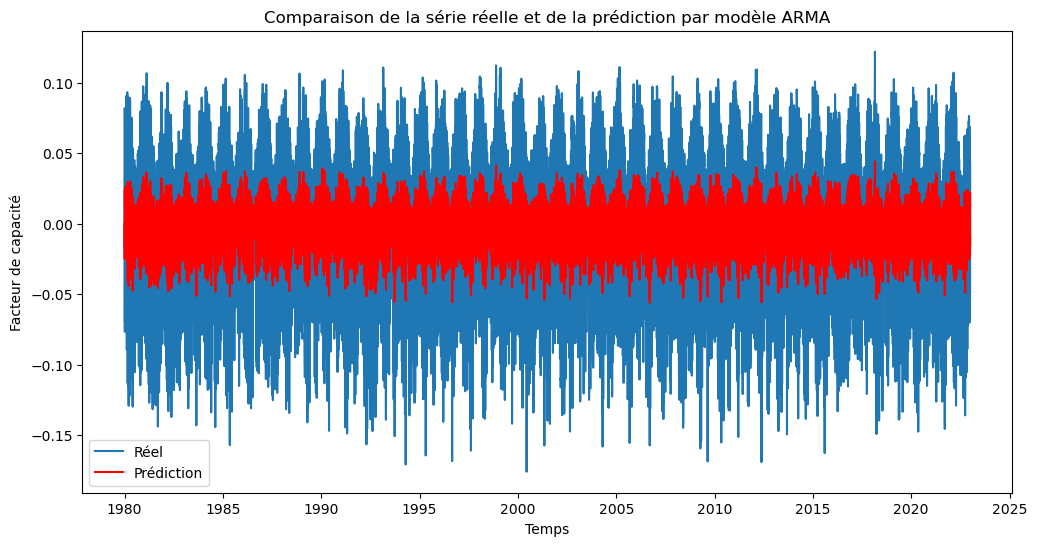

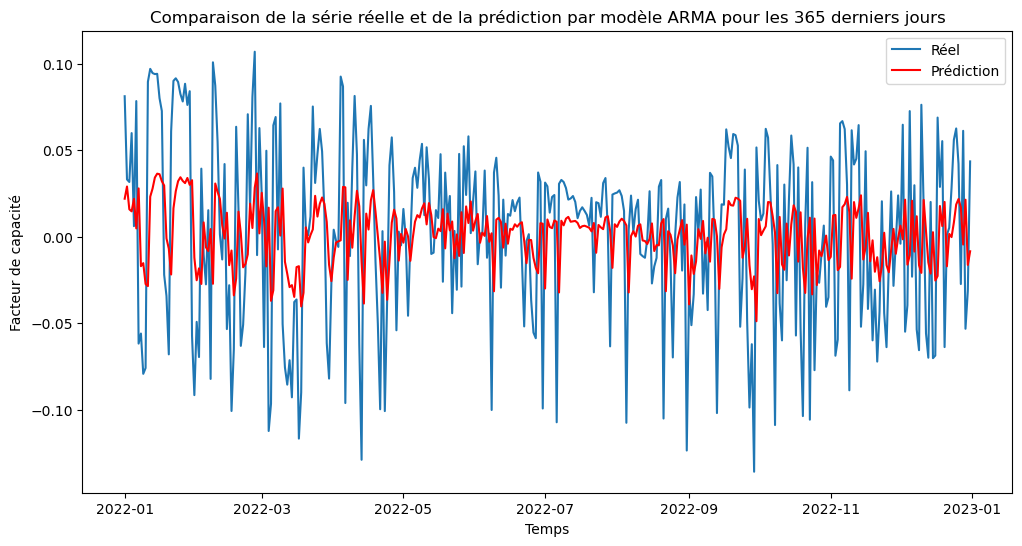

C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


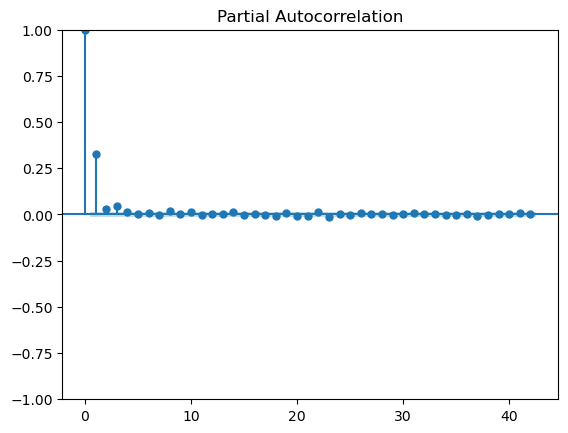

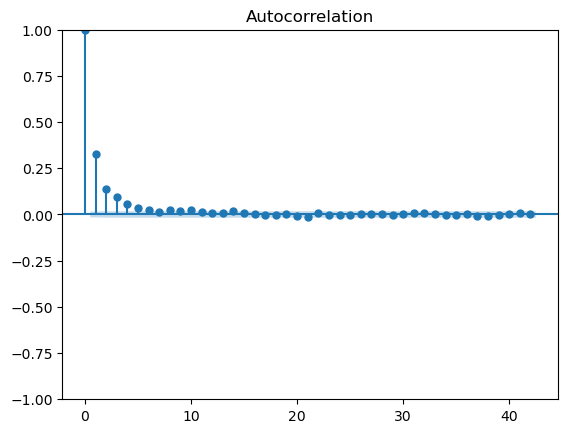

MSE: 0.002522382115659677
MAE: 0.040484512440735164
RMSE: 0.05022332242753039
R²: 0.05391827365349833


In [16]:
from methodes_etude_serie import Arma_predict

p=3
q=3
predict=Arma_predict(data_stationnary['electricity'],p,q,graph_predict=True,graph_predict_last_year=True,graph_autocorrelation=True,error=True)
